In [1]:
import os
import re
import pandas as pd

In [2]:
folder_path = 'data_raw'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
dfs = []
for file in json_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_json(file_path)
    dfs.append(data)
df_temp = pd.concat(dfs, ignore_index=True)

In [3]:
df = df_temp.copy()

In [4]:
df[df['phase'].notnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate
0,1955%E2%80%9356 European Cup,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,"30,000",NaN
1,1955%E2%80%9356 European Cup,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,"35,000",NaN
2,1955%E2%80%9356 European Cup,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,"7,000",NaN
3,1955%E2%80%9356 European Cup,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",First round,"5,000",NaN
4,1955%E2%80%9356 European Cup,1955-09-20,0-0,Djurgården,Sweden,Djurg%C3%A5rdens_IF_Fotboll,Gwardia Warsaw,Poland,Gwardia_Warsaw,"Stockholm Olympic Stadium, Stockholm",First round,"3,574",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29350,2024–25 UEFA Europa League qualifying phase an...,2024-08-29,v,Elfsborg,Sweden,NaN,Molde,Norway,NaN,"Borås Arena, Borås",Play-off round,NaN,NaN
29351,2024–25 UEFA Europa League qualifying phase an...,2024-08-22,2-1,Braga,Portugal,S.C._Braga,Rapid Wien,Austria,SK_Rapid_Wien,"Estádio Municipal, Braga",Play-off round,"15,868",NaN
29352,2024–25 UEFA Europa League qualifying phase an...,2024-08-29,v,Rapid Wien,Austria,NaN,Braga,Portugal,NaN,"Allianz Stadion, Vienna",Play-off round,NaN,NaN
29353,2024–25 UEFA Europa League qualifying phase an...,2024-08-22,1-0,Viktoria Plzeň,Czech Republic,FC_Viktoria_Plze%C5%88,Heart of Midlothian,Scotland,Heart_of_Midlothian_F.C.,"Doosan Arena, Plzeň",Play-off round,"10,506",NaN


In [5]:
df[df['phase'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate
7664,1991%E2%80%9392 European Cup first round,1991-09-18,3-0,Barcelona,Spain,FC_Barcelona,Hansa Rostock,East Germany,F.C._Hansa_Rostock,"Estadi del Futbol Club Barcelona, Barcelona",NaN,"78,000",NaN
7665,1991%E2%80%9392 European Cup first round,1991-10-02,1-0,Hansa Rostock,East Germany,FC_Hansa_Rostock,Barcelona,Spain,FC_Barcelona,"Ostseestadion, Rostock",NaN,"8,500",NaN
7666,1991%E2%80%9392 European Cup first round,1991-09-17,2-0,Kaiserslautern,Germany,1._FC_Kaiserslautern,Etar Veliko Tarnovo,Bulgaria,FC_Etar_(Veliko_Tarnovo),"Fritz-Walter-Stadion, Kaiserslautern",NaN,"24,698",NaN
7667,1991%E2%80%9392 European Cup first round,1991-10-02,1-1,Etar Veliko Tarnovo,Bulgaria,FC_Etar_(Veliko_Tarnovo),Kaiserslautern,Germany,1._FC_Kaiserslautern,"Stadion Ivaylo, Veliko Tarnovo",NaN,"6,492",NaN
7668,1991%E2%80%9392 European Cup first round,1991-09-18,0-5,Union Luxembourg,Luxembourg,Union_Luxembourg,Marseille,France,Olympique_de_Marseille,"Stade Josy Barthel, Luxembourg City",NaN,"7,618",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28810,2023%E2%80%9324 UEFA Europa League group stage,2023-11-09,1-3,BK Häcken,Sweden,BK_H%C3%A4cken,Molde,Norway,Molde_FK,"Ullevi, Gothenburg",NaN,"5,106",NaN
28811,2023%E2%80%9324 UEFA Europa League group stage,2023-11-30,2-2,Molde,Norway,Molde_FK,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,"Aker Stadion, Molde",NaN,"5,291",NaN
28812,2023%E2%80%9324 UEFA Europa League group stage,2023-11-30,0-2,BK Häcken,Sweden,BK_H%C3%A4cken,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"Ullevi, Gothenburg",NaN,"11,234",NaN
28813,2023%E2%80%9324 UEFA Europa League group stage,2023-12-14,5-1,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,Molde,Norway,Molde_FK,"BayArena, Leverkusen",NaN,"28,504",NaN


In [6]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).split('[')[0].replace(',',''))

In [7]:
df['score'] = df['score'].apply(lambda x: x.replace('–','-').split('[')[0].split('(')[0].strip().replace('\n','').replace(' ',''))

In [8]:
def denumber(x):
    if isinstance(x, str):
        while x[-1] in ['0','1','2','3','4','5','6','7','8','9']:
            x = x[:-1]
        return x.strip()
    else:
        return x

In [9]:
def tell_competition(x):
    x = str(x)
    if "Cup Winners" in x:
        return "CWC"
    elif ("European Cup" in x) and ('Winners') not in x:
        return "UCL"
    elif "Champions League" in x:
        return "UCL"
    elif ("UEFA Cup" in x) and ('Winners') not in x:
        return "EL"
    elif "Europa League" in x:
        return "EL"
    elif "Conference League" in x:
        return "UECL"
    elif "Inter-Cities Fairs Cup" in x:
        return "ICFC"
    elif "Intertoto" in x:
        return "Intertoto"
    else:
        print(x)
        return None

In [10]:
def tell_season(x):
    x = str(x)
    x = x.replace('%E2%80%93','-')
    try:
        season = re.search('\d{4}.{0,2}\d{0,4}',x).group()
        season = season.replace('–','-').strip()
        if len(season) == 9:
            season = season[0:5] + season[-2:]
        elif len(season) == 4:
            season = f"{int(season) - 1}-{season[-2:]}"
        return season
    except:
        return None

In [11]:
tell_season('1970%E2%80%9371 European Cup Winners%27 Cup')

'1970-71'

In [12]:
tell_season('2004%E2%80%9305_UEFA_Cup_qualifying_rounds')

'2004-05'

In [13]:
df['competitonOriginal'] = df['competition']

In [14]:
df['competition'] = df['competitonOriginal'].apply(lambda x: tell_competition(x))

In [15]:
df['season'] = df['competitonOriginal'].apply(lambda x: tell_season(x))

In [16]:
df['location'] = df['location'].apply(lambda x: denumber(x))

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['estimatedDate'] = pd.to_datetime(df['estimatedDate'], errors='coerce')

In [18]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).replace(' ',''))

In [19]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

In [20]:
df = df.drop_duplicates()

In [21]:
df = df.replace("1932-04-14","1966-04-14")
df = df.replace('Georgia (country)','Georgia')

In [22]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian F.C.'
df.loc[(df['homeTeam'].str.contains('Bohemia',na=False)) & (df['homeTeamCountry'] == 'Republic of Ireland'), 'homeTeam'] = 'Bohemian F.C.'
df.loc[(df['awayTeam'].str.contains('Bohemia',na=False)) & (df['awayTeamCountry'] == 'Republic of Ireland'), 'awayTeam'] = 'Bohemian F.C.'

In [23]:
df = df[df['homeTeam'] != 'TBD']
df = df[df['awayTeam'] != 'TBD']
df = df[df['homeTeam'] != '']
df = df[df['awayTeam'] != '']
df = df[df['score'] != 'Cancelled']
df = df[df['score'] != 'v']

In [24]:
df.groupby('score').size().nlargest(100).tail(50)

score
3                         14
6-3                       14
0-8                       13
1-7                       13
0-3Awarded                11
9-1                       10
2-7                        7
5-4                        7
-                          6
10-1                       6
8-2                        6
0-9                        5
11-0                       5
3-0Awarded                 5
3-6                        5
4                          4
1-8                        3
10-2                       3
7-3                        3
0-10                       2
1-10                       2
12-0                       2
13-0                       2
16-1                       2
2-12                       2
2-8                        2
8-3                        2
9-2                        2
Annulled                   2
n/a                        2
w/o                        2
0-11                       1
0-12                       1
0-1Annulled                1
0-1Award

In [25]:
df[df['phase'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
7664,UCL,1991-09-18,3-0,Barcelona,Spain,FC_Barcelona,Hansa Rostock,East Germany,F.C._Hansa_Rostock,"Estadi del Futbol Club Barcelona, Barcelona",NaN,78000.0,NaT,1991%E2%80%9392 European Cup first round,1991-92
7665,UCL,1991-10-02,1-0,Hansa Rostock,East Germany,FC_Hansa_Rostock,Barcelona,Spain,FC_Barcelona,"Ostseestadion, Rostock",NaN,8500.0,NaT,1991%E2%80%9392 European Cup first round,1991-92
7666,UCL,1991-09-17,2-0,Kaiserslautern,Germany,1._FC_Kaiserslautern,Etar Veliko Tarnovo,Bulgaria,FC_Etar_(Veliko_Tarnovo),"Fritz-Walter-Stadion, Kaiserslautern",NaN,24698.0,NaT,1991%E2%80%9392 European Cup first round,1991-92
7667,UCL,1991-10-02,1-1,Etar Veliko Tarnovo,Bulgaria,FC_Etar_(Veliko_Tarnovo),Kaiserslautern,Germany,1._FC_Kaiserslautern,"Stadion Ivaylo, Veliko Tarnovo",NaN,6492.0,NaT,1991%E2%80%9392 European Cup first round,1991-92
7668,UCL,1991-09-18,0-5,Union Luxembourg,Luxembourg,Union_Luxembourg,Marseille,France,Olympique_de_Marseille,"Stade Josy Barthel, Luxembourg City",NaN,7618.0,NaT,1991%E2%80%9392 European Cup first round,1991-92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28810,EL,2023-11-09,1-3,BK Häcken,Sweden,BK_H%C3%A4cken,Molde,Norway,Molde_FK,"Ullevi, Gothenburg",NaN,5106.0,NaT,2023%E2%80%9324 UEFA Europa League group stage,2023-24
28811,EL,2023-11-30,2-2,Molde,Norway,Molde_FK,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,"Aker Stadion, Molde",NaN,5291.0,NaT,2023%E2%80%9324 UEFA Europa League group stage,2023-24
28812,EL,2023-11-30,0-2,BK Häcken,Sweden,BK_H%C3%A4cken,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"Ullevi, Gothenburg",NaN,11234.0,NaT,2023%E2%80%9324 UEFA Europa League group stage,2023-24
28813,EL,2023-12-14,5-1,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,Molde,Norway,Molde_FK,"BayArena, Leverkusen",NaN,28504.0,NaT,2023%E2%80%9324 UEFA Europa League group stage,2023-24


In [26]:
df[df['phase'] == 'Summary']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
28894,EL,NaT,1-3,Žalgiris,Lithuania,FK_%C5%BDalgiris,BK Häcken,Sweden,BK_H%C3%A4cken,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28895,EL,NaT,5-0,BK Häcken,Sweden,BK_H%C3%A4cken,Žalgiris,Lithuania,FK_%C5%BDalgiris,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28896,EL,NaT,2-1,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,HJK,Finland,Helsingin_Jalkapalloklubi,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28897,EL,NaT,1-2,HJK,Finland,Helsingin_Jalkapalloklubi,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28898,EL,NaT,6-2,Zrinjski Mostar,Bosnia and Herzegovina,H%C5%A0K_Zrinjski_Mostar,Breiðablik,Iceland,Brei%C3%B0ablik_men%27s_football,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28899,EL,NaT,1-0,Breiðablik,Iceland,Brei%C3%B0ablik_men%27s_football,Zrinjski Mostar,Bosnia and Herzegovina,H%C5%A0K_Zrinjski_Mostar,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28900,EL,NaT,5-1,Sheriff Tiraspol,Moldova,FC_Sheriff_Tiraspol,BATE Borisov,Belarus,FC_BATE_Borisov,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28901,EL,NaT,2-2,BATE Borisov,Belarus,FC_BATE_Borisov,Sheriff Tiraspol,Moldova,FC_Sheriff_Tiraspol,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28902,EL,NaT,2-1,Astana,Kazakhstan,FC_Astana,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24
28903,EL,NaT,5-1,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,Astana,Kazakhstan,FC_Astana,NaN,Summary,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24


In [27]:
df['phase'] = df['phase'].apply(lambda x: str(x).lower().replace('–','-'))

In [28]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",first round,30000.0,NaT,1955%E2%80%9356 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",first round,35000.0,NaT,1955%E2%80%9356 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",first round,7000.0,NaT,1955%E2%80%9356 European Cup,1955-56
3,UCL,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",first round,5000.0,NaT,1955%E2%80%9356 European Cup,1955-56
4,UCL,1955-09-20,0-0,Djurgården,Sweden,Djurg%C3%A5rdens_IF_Fotboll,Gwardia Warsaw,Poland,Gwardia_Warsaw,"Stockholm Olympic Stadium, Stockholm",first round,3574.0,NaT,1955%E2%80%9356 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29345,EL,2024-08-22,4-0,PAOK,Greece,PAOK_FC,Shamrock Rovers,Republic of Ireland,Shamrock_Rovers_F.C.,"Toumba Stadium, Thessaloniki",play-off round,13871.0,NaT,2024–25 UEFA Europa League qualifying phase an...,2024-25
29347,EL,2024-08-22,0-0,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Borac Banja Luka,Bosnia and Herzegovina,FK_Borac_Banja_Luka,"Ferencváros Stadion, Budapest",play-off round,13167.0,NaT,2024–25 UEFA Europa League qualifying phase an...,2024-25
29349,EL,2024-08-22,0-1,Molde,Norway,Molde_FK,Elfsborg,Sweden,IF_Elfsborg,"Aker Stadion, Molde",play-off round,4115.0,NaT,2024–25 UEFA Europa League qualifying phase an...,2024-25
29351,EL,2024-08-22,2-1,Braga,Portugal,S.C._Braga,Rapid Wien,Austria,SK_Rapid_Wien,"Estádio Municipal, Braga",play-off round,15868.0,NaT,2024–25 UEFA Europa League qualifying phase an...,2024-25


In [29]:
def desummary(row):
    if row['phase'] not in ['summary','teams','notes','match','matches','none','nan','round and draw dates','route to the final', 'final']:
        return row['phase']
    elif (row['phase'] == 'final') & (row['homeTeamCountry'] not in ['Montenegro','Kosovo','Andorra']):
        return row['phase']
    else:
        if 'League' in row['competitonOriginal']:
            return row['competitonOriginal'].split('League')[1].strip()
        elif 'Cup' in row['competitonOriginal']:
            return row['competitonOriginal'].split('Cup')[1].strip()

In [30]:
df['phase'] = df.apply(lambda x: desummary(x), axis=1)

In [31]:
df[df['phase'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season


In [32]:
df[df['phase'] == 'route to the final']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season


In [33]:
df.groupby('phase').size()

phase
final                                   214
final round                               3
finals                                   60
first group stage                       384
first qualifying round                 2281
first round                            5739
fourth round                             80
group stage                            5457
knockout round play-offs                128
play-off round                         1245
preliminary round                       615
qualified teams                         144
qualifying match                          2
qualifying phase and play-off round      37
qualifying round                        694
quarter-finals                         1440
round of 16                             724
round of 32                             542
second group stage                      192
second qualifying round                2838
second round                           2712
semi-final round                          6
semi-finals               

<Axes: xlabel='season'>

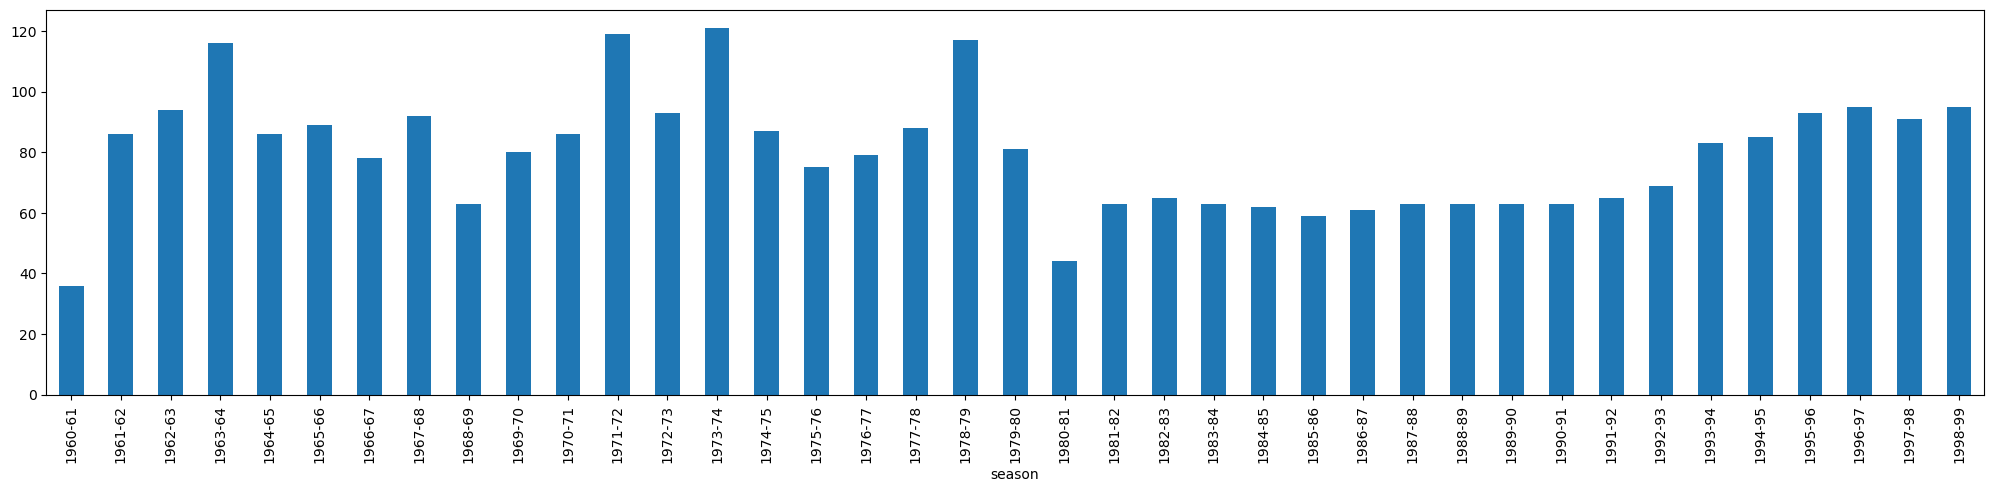

In [34]:
df[df['competition'] == 'CWC'].groupby('season').size().plot.bar(figsize=(25,5))

In [35]:
df[df['season'] == '1955-56']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",first round,30000.0,NaT,1955%E2%80%9356 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",first round,35000.0,NaT,1955%E2%80%9356 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",first round,7000.0,NaT,1955%E2%80%9356 European Cup,1955-56
3,UCL,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",first round,5000.0,NaT,1955%E2%80%9356 European Cup,1955-56
4,UCL,1955-09-20,0-0,Djurgården,Sweden,Djurg%C3%A5rdens_IF_Fotboll,Gwardia Warsaw,Poland,Gwardia_Warsaw,"Stockholm Olympic Stadium, Stockholm",first round,3574.0,NaT,1955%E2%80%9356 European Cup,1955-56
5,UCL,1955-09-21,6-1,Rapid Wien,Austria,SK_Rapid_Wien,PSV Eindhoven,Netherlands,PSV_Eindhoven,"Pfarrwiese, Vienna",first round,10000.0,NaT,1955%E2%80%9356 European Cup,1955-56
6,UCL,1955-09-21,0-2,AGF Aarhus,Denmark,Aarhus_Gymnastikforening,Reims,France,Stade_de_Reims,"Idrætsparken, Copenhagen",first round,18000.0,NaT,1955%E2%80%9356 European Cup,1955-56
7,UCL,1955-11-01,3-4,Milan,Italy,AC_Milan,Saarbrücken,Saar Protectorate,1._FC_Saarbr%C3%BCcken,"San Siro, Milan",first round,18000.0,NaT,1955%E2%80%9356 European Cup,1955-56
8,UCL,1955-10-12,5-2,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,Sporting CP,Portugal,Sporting_CP,"Stadion JNA, Belgrade",first round,15000.0,NaT,1955%E2%80%9356 European Cup,1955-56
9,UCL,1955-10-12,5-0,Real Madrid,Spain,Real_Madrid_CF,Servette,Switzerland,Servette_FC,"Santiago Bernabéu, Madrid",first round,40318.0,NaT,1955%E2%80%9356 European Cup,1955-56


In [36]:
df.sort_values(['homeTeam', 'awayTeam', 'score', 'season', 'date'], ascending=[True, True, True, True, False], inplace=True)

In [37]:
df[df['date'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
1894,CWC,NaT,3-0,1. FC Köln,West Germany,1._FC_K%C3%B6ln,ADO Den Haag,Netherlands,ADO_Den_Haag,NaN,second round,NaN,1968-11-13,1968%E2%80%9369 European Cup Winners%27 Cup,1968-69
1909,CWC,NaT,2-2,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Barcelona,Spain,FC_Barcelona,NaN,semi-finals,NaN,1969-05-21,1968%E2%80%9369 European Cup Winners%27 Cup,1968-69
27581,UECL,NaT,1-2,1. FC Köln,Germany,1._FC_K%C3%B6ln,Fehérvár,Hungary,Feh%C3%A9rv%C3%A1r_FC,NaN,play-off round,NaN,2022-08-18,2022%E2%80%9323 UEFA Europa Conference League ...,2022-23
1876,CWC,NaT,3-0,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Girondins Bordeaux,France,Girondins_Bordeaux,NaN,first round,NaN,1968-09-18,1968%E2%80%9369 European Cup Winners%27 Cup,1968-69
1903,CWC,NaT,2-1,1. FC Köln,West Germany,1._FC_K%C3%B6ln,Randers,Denmark,Randers_Freja,NaN,quarter-finals,NaN,1969-02-19,1968%E2%80%9369 European Cup Winners%27 Cup,1968-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28616,UECL,NaT,2-5,Žilina,Slovakia,M%C5%A0K_%C5%BDilina,Gent,Belgium,K.A.A._Gent,NaN,second qualifying round,NaN,2023-07-27,2023%E2%80%9324 UEFA Europa Conference League ...,2023-24
26540,UECL,NaT,0-3,Žilina,Slovakia,M%C5%A0K_%C5%BDilina,Jablonec,Czech Republic,FK_Jablonec,NaN,play-off round,NaN,2021-08-19,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22
26492,UECL,NaT,5-0,Žilina,Slovakia,M%C5%A0K_%C5%BDilina,Tobol,Kazakhstan,FC_Tobol,NaN,third qualifying round,NaN,2021-08-05,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22
1331,CWC,NaT,0-2,Știința Cluj,Romania,FC_Universitatea_Cluj,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,NaN,second round,NaN,1965-11-17,1965%E2%80%9366 European Cup Winners%27 Cup,1965-66


In [38]:
def short_name(name):
    try:
        return name[0:4]
    except:
        return name

In [39]:
df['homeTeamShort'] = df['homeTeam'].apply(lambda x: short_name(x))
df['awayTeamShort'] = df['awayTeam'].apply(lambda x: short_name(x))

In [40]:
mask = (df['competition'].isin(['CWC','UECL'])) & df.duplicated(subset=['season','competition','homeTeamShort', 'awayTeamShort', 'score'], keep='first')

In [41]:
df = df[~mask]

<Axes: xlabel='season'>

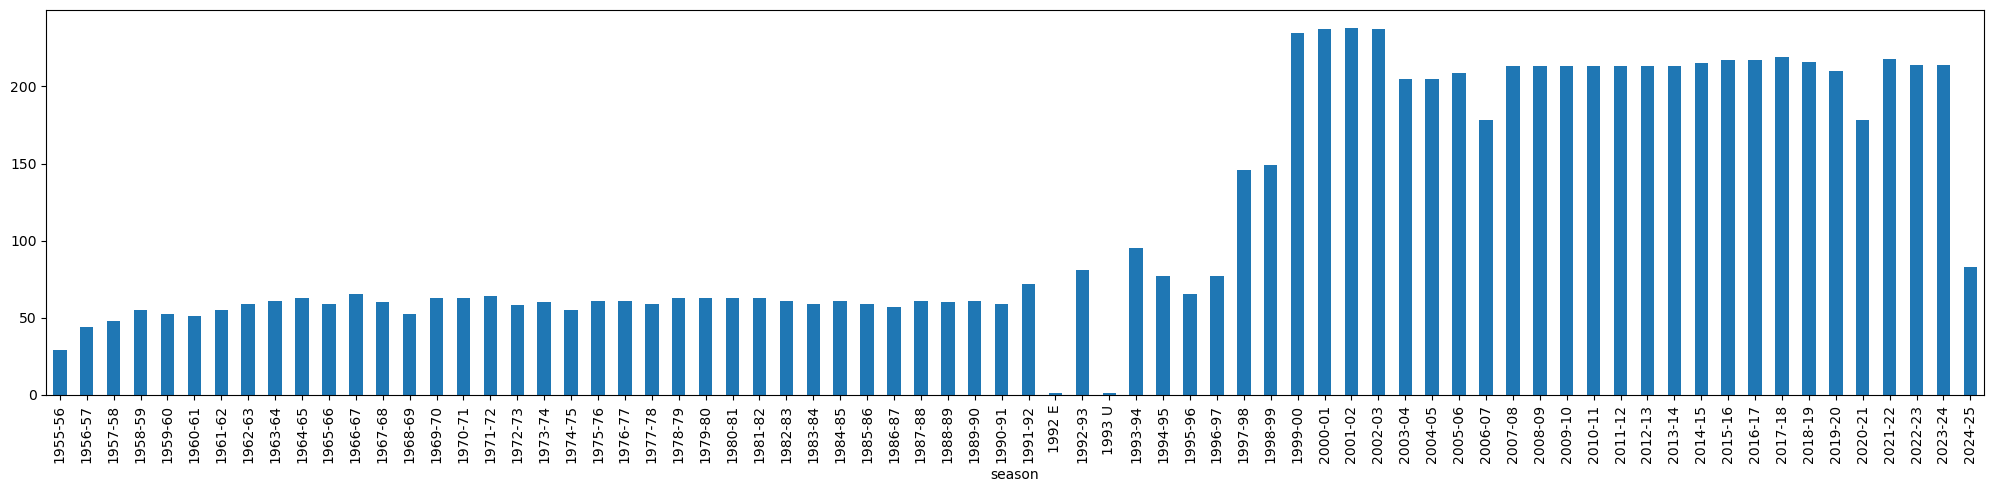

In [42]:
df[df['competition'] == 'UCL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

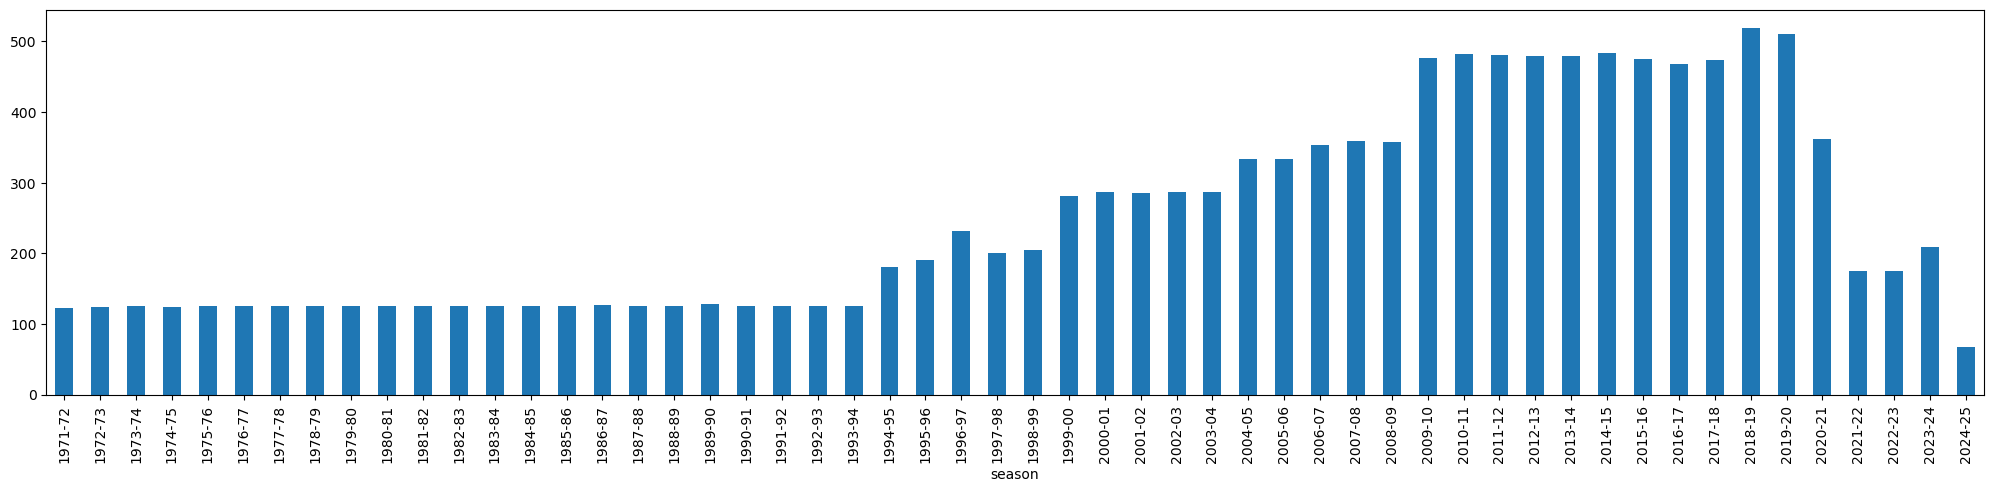

In [43]:
df[df['competition'] == 'EL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

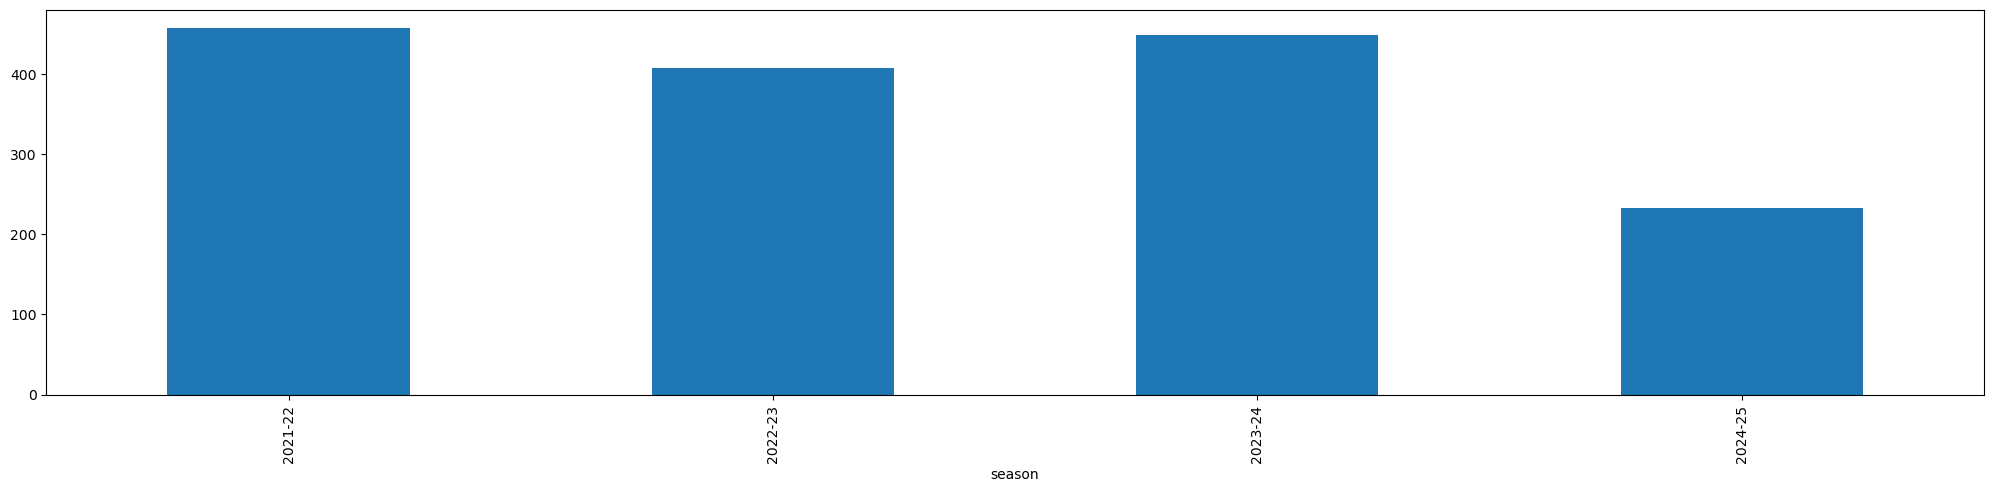

In [44]:
df[df['competition'] == 'UECL'].groupby('season').size().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

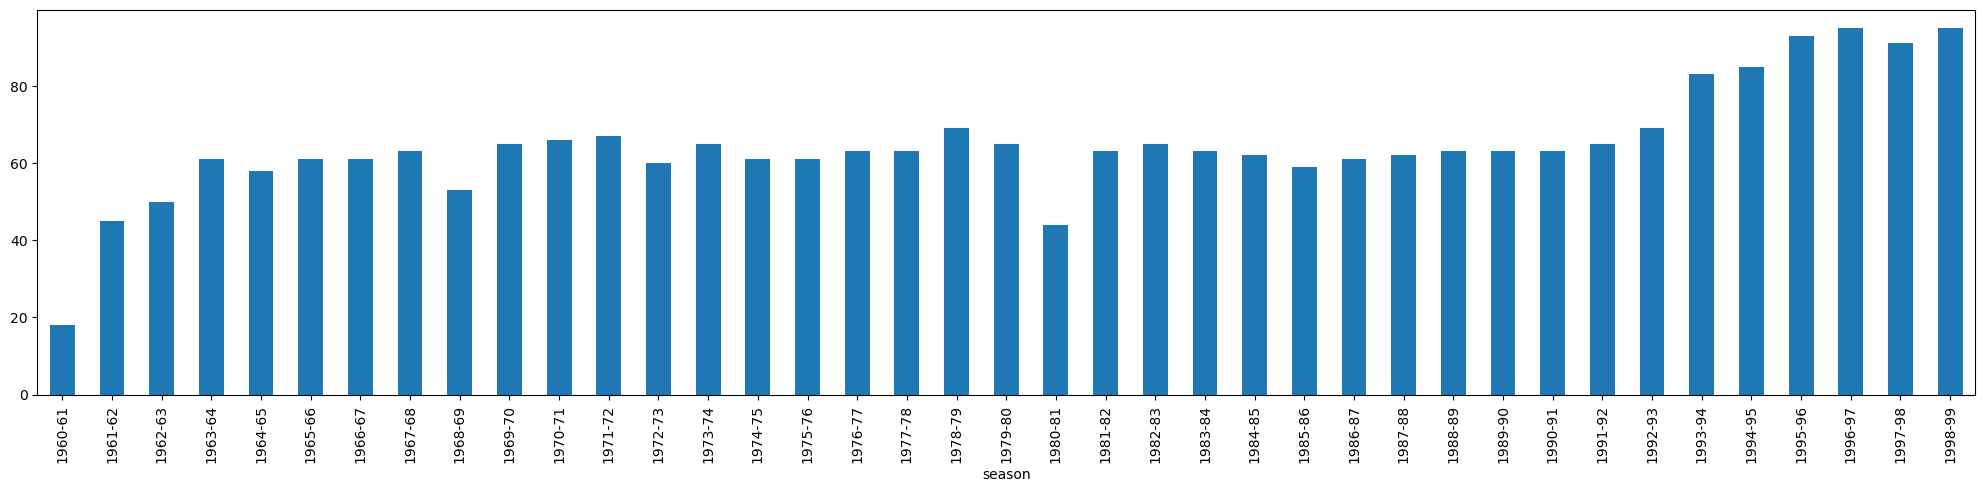

In [45]:
df[df['competition'] == 'CWC'].groupby('season').size().plot.bar(figsize=(25,5))

In [46]:
df[(df['competition'] == 'CWC') & (df['season'] == '1977-78')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,homeTeamShort,awayTeamShort
4175,CWC,1978-05-03,4-0,Anderlecht,Belgium,R.S.C._Anderlecht,Austria Wien,Austria,FK_Austria_Wien,"Parc des Princes, Paris",final,48679.0,NaT,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Ande,Aust
4217,CWC,NaT,1-1,Anderlecht,Belgium,R.S.C._Anderlecht,Hamburg,West Germany,Hamburger_SV,NaN,second round,NaN,1977-10-19,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Ande,Hamb
4193,CWC,NaT,2-0,Anderlecht,Belgium,R.S.C._Anderlecht,Lokomotiv Sofia,Bulgaria,PFC_Lokomotiv_Sofia,NaN,first round,NaN,1977-09-14,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Ande,Loko
4174,CWC,1978-03-15,3-0,Anderlecht,Belgium,R.S.C._Anderlecht,Porto,Portugal,FC_Porto,"Stade Émile Versé, Brussels",quarter-finals,28228.0,NaT,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Ande,Port
4235,CWC,NaT,2-0,Anderlecht,Belgium,R.S.C._Anderlecht,Twente,Netherlands,FC_Twente,NaN,semi-finals,NaN,1978-05-03,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Ande,Twen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,CWC,NaT,0-2,Valletta,Malta,Valletta_F.C.,Dynamo Moscow,Soviet Union,FC_Dynamo_Moscow,NaN,first round,NaN,1977-09-14,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Vall,Dyna
4177,CWC,NaT,2-2,Young Boys,Switzerland,BSC_Young_Boys,Rangers,Scotland,Rangers_F.C.,NaN,qualifying match,NaN,1977-09-14,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Youn,Rang
4181,CWC,NaT,0-2,Zagłębie Sosnowiec,Poland,Zag%C5%82%C4%99bie_Sosnowiec,PAOK,Greece,PAOK_FC,NaN,first round,NaN,1977-09-14,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,Zagł,PAOK
4166,CWC,1977-09-28,0-4,ÍA Akranes,Iceland,%C3%8D%C3%BEr%C3%B3ttabandalag_Akraness,Brann,Norway,SK_Brann,"Akranesvöllur, Akranes",first round,1800.0,NaT,1977%E2%80%9378 European Cup Winners%27 Cup,1977-78,ÍA A,Bran


In [47]:
def join_dates(row):
    if row['date'] != None:
        return row['date']
    else:
        return row['estimatedDate']

In [48]:
df['working_date'] = df.apply(lambda row: join_dates(row), axis=1)

C:\Users\micha\AppData\Local\Temp\ipykernel_3176\84741970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['working_date'] = df.apply(lambda row: join_dates(row), axis=1)


In [49]:
df = df.sort_values(by=['season','competition','date','working_date'])

In [50]:
df = df.drop(columns=['working_date','homeTeamShort','awayTeamShort'])

In [51]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'

In [52]:
df.loc[(df['phase'].str.contains('semi',na=False) & (df['competitonOriginal'].str.lower().str.contains('qualif',na=False))), 'phase'] = 'qualifying round'

In [53]:
df[(df['competition'] == 'UCL') & (df['phase'] == 'semi-finals')].sample(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season
16862,UCL,2009-05-06,1-1,Chelsea,England,Chelsea_F.C.,Barcelona,Spain,FC_Barcelona,"Stamford Bridge, London",semi-finals,37857.0,NaT,2008%E2%80%9309 UEFA Champions League knockout...,2008-09
1846,UCL,1969-04-24,2-0,Spartak Trnava,Czechoslovakia,FC_Spartak_Trnava,Ajax,Netherlands,AFC_Ajax,"Spartak Stadium, Trnava",semi-finals,22938.0,NaT,1968%E2%80%9369 European Cup,1968-69
7470,UCL,1991-04-10,1-2,Bayern Munich,Germany,FC_Bayern_Munich,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,"Olympiastadion, Munich",semi-finals,63700.0,NaT,1990%E2%80%9391 European Cup,1990-91
142,UCL,1958-05-14,4-0,Milan,Italy,AC_Milan,Manchester United,England,Manchester_United_F.C.,"San Siro, Milan",semi-finals,60000.0,NaT,1957%E2%80%9358 European Cup,1957-58
451,UCL,1962-03-22,4-0,Real Madrid,Spain,Real_Madrid_C.F.,Standard Liège,Belgium,Standard_Li%C3%A8ge,"Santiago Bernabéu, Madrid",semi-finals,110000.0,NaT,1961%E2%80%9362 European Cup,1961-62
9391,UCL,1997-04-09,1-2,Ajax,Netherlands,AFC_Ajax,Juventus,Italy,Juventus_FC,"Amsterdam Arena, Amsterdam",semi-finals,51200.0,NaT,1996%E2%80%9397 UEFA Champions League knockout...,1996-97
4729,UCL,1980-04-09,2-0,Real Madrid,Spain,Real_Madrid_C.F.,Hamburg,West Germany,Hamburger_SV,"Santiago Bernabeu Stadium, Madrid",semi-finals,121106.0,NaT,1979%E2%80%9380 European Cup,1979-80
11121,UCL,2000-05-09,2-1,Bayern Munich,Germany,FC_Bayern_Munich,Real Madrid,Spain,Real_Madrid_C.F.,"Olympiastadion, Munich",semi-finals,60234.0,NaT,1999%E2%80%932000 UEFA Champions League knocko...,1999-00
6721,UCL,1988-04-06,1-1,Real Madrid,Spain,Real_Madrid_C.F.,PSV Eindhoven,Netherlands,PSV_Eindhoven,"Santiago Bernabéu Stadium, Madrid",semi-finals,90000.0,NaT,1987%E2%80%9388 European Cup,1987-88
2013,UCL,1970-04-01,0-0,Legia Warsaw,Poland,Legia_Warsaw,Feyenoord,Netherlands,Feyenoord,"Stadion Wojska Polskiego, Warsaw",semi-finals,23760.0,NaT,1969%E2%80%9370 European Cup,1969-70


In [54]:
df.loc[df['season'] == '1992 E', 'season'] = '1991-92'
df.loc[df['season'] == '1993 U', 'season'] = '1992-93'

In [55]:
df.loc[(df['season'] == '1963-64') & (df['homeTeam'] == 'Slovan Bratislava'), 'homeTeamCountry'] = 'Czechoslovakia'
df.loc[(df['season'] == '1963-64') & (df['awayTeam'] == 'Slovan Bratislava'), 'awayTeamCountry'] = 'Czechoslovakia'

In [56]:
df.to_csv(os.path.join('data','matches.csv'), index=False)